<a href="https://colab.research.google.com/github/LynaMahdi/Fake-True-News-Detection/blob/main/Fake_True_news_using_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importer les librairies**


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt
import tensorflow as tf
import seaborn as sn
import nltk 
import re
import wordcloud as WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding , LSTM, Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
  
od.download(    "https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lynamahdi
Your Kaggle Key: ··········


100%|██████████| 41.0M/41.0M [00:02<00:00, 15.4MB/s]


#**Export Fake data**


In [5]:
fileF=pd.read_csv('fake-and-real-news-dataset/Fake.csv')

In [62]:
fileF.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [63]:
fileF.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fileF["class"]=0

In [65]:
fileF["text"]

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 23481, dtype: object

In [66]:
fileF['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

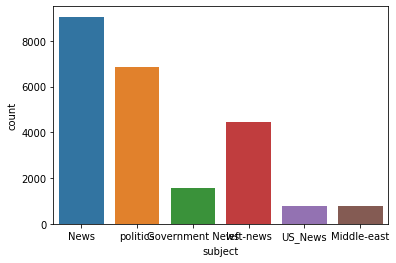

In [67]:
sn.countplot(x='subject',data=fileF)

In [7]:
fileV=pd.read_csv('fake-and-real-news-dataset/True.csv')

In [69]:
fileV.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fileV["class"]=1

In [71]:
fileV["text"]

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 21417, dtype: object

In [ ]:
#remove  the reference from the text in True.csv (WASHINGTON (Reuters) - ....)
new_text= []

for rows , index in enumerate(fileV["text"]):
  s=index.split('-',maxsplit=1)
  new_text.append(s[1])

In [9]:
#concatenate the true and fake news
data=pd.concat([fileV,fileF]).reset_index(drop = True)

In [10]:
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


#**Data Cleanning**

In [11]:
#drop the date column
data.drop("date",axis=1)

,title,text,subject,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


In [ ]:
#collect the indexes of lines containing  empty texts
empty_text=[index for  index, text in enumerate(data["text"]) if str(text).strip()==""]
empty_text

In [13]:
data.iloc[empty_text]

,title,text,subject,date,class
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",1
32340,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0
32607,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",0
32642,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",0
...,...,...,...,...,...
43233,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",0
43243,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0
43244,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0
43274,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0


In [14]:
#drop the lines containing empty texts
data.drop(empty_text)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [15]:
#put the text in lower case
data["text"]=data["text"].apply(lambda x: x.lower())
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",washington (reuters) - the head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington (reuters) - the special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsNews,"December 29, 2017",1


In [16]:
#drop special characters 
import string

def special_characters(text):
  remove=''.join(char for char in text if char  not in string.punctuation)
  
  return remove

data["text"]=data["text"].apply(special_characters)

In [17]:
data["text"]

0        washington reuters  the head of a conservative...
1        washington reuters  transgender people will be...
2        washington reuters  the special counsel invest...
3        washington reuters  trump campaign adviser geo...
4        seattlewashington reuters  president donald tr...
                               ...                        
44893    21st century wire says as 21wire reported earl...
44894    21st century wire says it s a familiar theme w...
44895    patrick henningsen  21st century wireremember ...
44896    21st century wire says al jazeera america will...
44897    21st century wire says as 21wire predicted in ...
Name: text, Length: 44898, dtype: object

In [21]:
from sklearn.utils import shuffle
data=shuffle(data)

#**Processing**


In [22]:
import gensim # pour Tokenizer , pad_sequences...

In [23]:
x=[data.split() for data in data["text"].tolist()]

y=data["class"].values

In [24]:
dimension=100
word2vect=gensim.models.Word2Vec(sentences=x,size=dimension,window=10,min_count=1 )

In [25]:
word2vect.wv.most_similar("europe")

[('germany', 0.8232561349868774),
 ('migration', 0.7041752338409424),
 ('integration', 0.6992806196212769),
 ('france', 0.6992112398147583),
 ('italy', 0.6733102798461914),
 ('balkans', 0.672204852104187),
 ('europeans', 0.657898485660553),
 ('poland', 0.6543099880218506),
 ('continent', 0.6467230319976807),
 ('european', 0.6429836750030518)]

In [26]:
token=Tokenizer()
token.fit_on_texts(x)
x=token.texts_to_sequences(x)


In [27]:
token.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 's': 9,
 'for': 10,
 'is': 11,
 'said': 12,
 'he': 13,
 'it': 14,
 'with': 15,
 'was': 16,
 'trump': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'us': 32,
 'but': 33,
 'would': 34,
 'we': 35,
 'i': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'people': 45,
 'were': 46,
 'or': 47,
 'more': 48,
 'which': 49,
 'she': 50,
 'after': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'all': 55,
 'out': 56,
 'what': 57,
 'when': 58,
 'its': 59,
 'also': 60,
 'state': 61,
 'new': 62,
 'up': 63,
 'there': 64,
 'reuters': 65,
 'no': 66,
 'over': 67,
 'donald': 68,
 'our': 69,
 'house': 70,
 'government': 71,
 'can': 72,
 'clinton': 73,
 'states': 74,
 'than': 75,
 'so': 76,
 'obama': 77,
 'other': 78,
 'him': 79,
 'just': 80,
 'repub

In [28]:
maxlen=120
vocabulary_size=len(token.word_index)+1
x=pad_sequences(x,maxlen=maxlen)

In [29]:
def embeddings_matrix(model) :
  embeddings_matrix=np.zeros((vocabulary_size,dimension))

  for word , i in token.word_index.items():

    embeddings_matrix[i]=model.wv[word]


  return embeddings_matrix

In [30]:
embedding_vect=embeddings_matrix(word2vect)

In [41]:
model=Sequential()
model.add(Embedding(vocabulary_size,input_length=maxlen,output_dim=dimension,weights=[embedding_vect],trainable=False))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [43]:
model.fit(x_train,y_train , epochs=8 , validation_split=0.3)

Epoch 1/8
737/737 [==============================] - 8s 8ms/step - loss: 0.1144 - accuracy: 0.9577 - val_loss: 0.0644 - val_accuracy: 0.9769
Epoch 2/8
737/737 [==============================] - 5s 7ms/step - loss: 0.0521 - accuracy: 0.9829 - val_loss: 0.0544 - val_accuracy: 0.9823
Epoch 3/8
737/737 [==============================] - 5s 7ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0554 - val_accuracy: 0.9823
Epoch 4/8
737/737 [==============================] - 5s 7ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0583 - val_accuracy: 0.9832
Epoch 5/8
737/737 [==============================] - 5s 7ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0636 - val_accuracy: 0.9815
Epoch 6/8
737/737 [==============================] - 6s 8ms/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.0919 - val_accuracy: 0.9755
Epoch 7/8
737/737 [==============================] - 5s 7ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0763 - val_accuracy: 0.9802
Epoch 8/8
737

In [48]:
#fke news
x=["After winning the presidential election but losing the popular vote, Mr. Trump took to Twitter to claim that he actually received more votes than Mrs. Clinton "]
x=token.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [51]:
(model.predict(x)>=0.5).astype(int)

1/1 [==============================] - 0s 29ms/step


array([[0]])